<a href="https://colab.research.google.com/github/AdityaGogoi/Fast-AI-Deep-Learning/blob/master/Lesson2_Stochastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
n=100

In [0]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.9859,  1.0000],
        [-0.2138,  1.0000],
        [ 0.2412,  1.0000],
        [ 0.5505,  1.0000],
        [ 0.4653,  1.0000]])

In [0]:
a = tensor(3.,2); a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

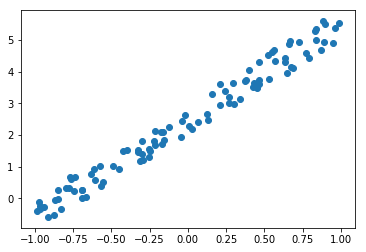

In [0]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
a = tensor(-1.,1)

In [0]:
y_hat = x@a
mse(y_hat, y)

tensor(7.7230)

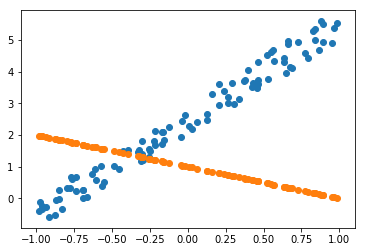

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [0]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [0]:
lr = 1e-1
for t in range(100): update()

tensor(7.7230, grad_fn=<MeanBackward0>)
tensor(1.4323, grad_fn=<MeanBackward0>)
tensor(0.3931, grad_fn=<MeanBackward0>)
tensor(0.1568, grad_fn=<MeanBackward0>)
tensor(0.1021, grad_fn=<MeanBackward0>)
tensor(0.0894, grad_fn=<MeanBackward0>)
tensor(0.0864, grad_fn=<MeanBackward0>)
tensor(0.0858, grad_fn=<MeanBackward0>)
tensor(0.0856, grad_fn=<MeanBackward0>)
tensor(0.0856, grad_fn=<MeanBackward0>)


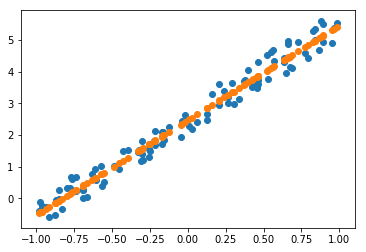

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [0]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.

### Relation Between Salinity and Oceanic Temperature
In this project I will use the [CalCOFI](https://www.kaggle.com/sohier/calcofi) dataset from Kaggle. 

The CalCOFI (**California Cooperative Oceanic Fisheries Investigations**) gathers time series of oceanographic and larval fish data in the world.

I will use the data gathered to find out if there is a relationship between wtaer salinity and temperature in the Oceans.

My first task would be to get the right CSV file from my Drive to the notebook.

I will use the **bottle.csv** portion of the dataset as it has data relevant to my objective.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = Path(base_dir + 'data/CalCOFI/')

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
file = 'bottle.csv'
raw_data = pd.read_csv(path/file)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
raw_data.head(5)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that I have the raw data, it is time for **data cleaning**.

My first step would be to only include **essential columns**. In this case, it would be: 

1. **Sta_ID** - Unique ID for the Station from where the data was collected. 
2. **Depth_ID** - Consists of useful contextual information like **Century-YY|MM|ShipCode-CastType|Julian Day-CastTime-Line|Sta|Depth|Bottle-Rec_Ind**
3. **Depthm** - Depth in **metres** 
4. **T_degC** - Water Temperature in degree **Celsius**
5. **Salnty** - Salinity in terms of "**gram per Kg of Water**" (g/Kg)

For safekeeping, I will push this filtered data in my **Drive** as a **CSV file**.

In [0]:
data_imp_cols = raw_data[['Sta_ID', 'Depth_ID', 'Depthm', 'T_degC', 'Salnty']]
data_imp_cols.head(5)

,Sta_ID,Depth_ID,Depthm,T_degC,Salnty
0,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440
1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440
2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437
3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420
4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421


In [0]:
store_file_name = 'data_imp_cols.csv'
data_imp_cols.to_csv(path_or_buf=path/store_file_name, index=False)

There are various **factors** that **affect water temperature** in the Ocean:

1. **Global warming** - increase Ocean Temperature with Time.
2. **Depth** - the Ocean depth at which the temperature was measured also affects temperature.

We are trying to prove that **Salinity affects Ocean temperatures**. So we need to make sure that **other factors** are **not affecting** our results. We can do this by:
 
1. Ensuring that the **data only pertains** to a **specific time-period** i.e. **last 10 years** or so. This will **reduce the affect of Global Warming** on the results.

2. Ensuring that the **data is gathered** only from **specific range of depth** i.e **20 meters from sea-level**. This will ensure that we are not comparing temperature from the Ocean surface with temperature from 1000 metres below sea-level, which will obviously be colder.

But before we do this filtering, we need to know the **data-type** of **each field** in the dataset.

In [0]:
data_imp_cols.dtypes

Sta_ID       object
Depth_ID     object
Depthm        int64
T_degC      float64
Salnty      float64
dtype: object

We can see that **measurment columns** (depth, temperature, salinity) are **integer or float** types and **identification columns** (station_id and depth_id) are **Object** type (i.e. **string**). 

This **matches our requirements**, so we will go ahead with our data filtering.

The **depth limit** filtering is easy. We just have to filter out data if the **Depthm** column has a value **less than or equal to 20**.

In [0]:
data_filter1 = data_imp_cols[data_imp_cols['Depthm']<=20]
data_filter1.head(6)

,Sta_ID,Depth_ID,Depthm,T_degC,Salnty
0,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440
1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440
2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437
3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420
4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421
29,052.0 075.0,19-4903CR-HY-060-2112-05200750-0000B-3,0,10.10,32.950


It seems that there is **no 21st century data** in the CSV File. So we will have to work with **20th century** temperatues.

We will focus on the **latest 20 years** (or close) of the **20th Century** so that our dataset is **recent** and is **not affected by Global Warming**.

The **Depth_ID** column has the **Century data** along with the **Year-Month** data. All we have to do is to specify the **century and year** range. The latest year in the 20 Century is **16**, so our range will be "**20-00**" to "**20-16**".


In [0]:
dates =['20-16', '20-15', '20-14', '20-13', '20-12', '20-11', '20-10', '20-09', '20-08', '20-07', '20-06', '20-05', '20-04', '20-03', '20-02', '20-01', '20-00']

def matcher(x):
    for date in dates:
        if x.startswith(date):
            return True
    else:
        return False

In [0]:
data_filtered2 = data_filter1[data_filter1['Depth_ID'].apply(matcher)]
data_filtered2.head(6)

,Sta_ID,Depth_ID,Depthm,T_degC,Salnty
728476,093.3 026.7,20-0001NM-PR-007-2019-09330267-0000B-7,0,14.40,33.590
728477,093.3 026.7,20-0001NM-PR-007-2019-09330267-0001A-3,1,14.40,33.593
728478,093.3 026.7,20-0001NM-PR-007-2019-09330267-0002A-6,2,14.42,33.592
728479,093.3 026.7,20-0001NM-PR-007-2019-09330267-0006A-3,6,14.22,33.588
728480,093.3 026.7,20-0001NM-PR-007-2019-09330267-0010A-7,10,14.09,33.599
728481,093.3 026.7,20-0001NM-PR-007-2019-09330267-0011A-3,11,14.06,33.602


Now that we have the **desired range of data**, we can extract only the columns **necessary for our research** - Temperature (**T_degC**) and Salinity (**Salnty**).

We will **save** this latest information as a CSV file in our Drive for safekeeping.

In [0]:
final_dataset = data_filtered2[['Salnty', 'T_degC']]
final_dataset.head(6)

,Salnty,T_degC
728476,33.590,14.40
728477,33.593,14.40
728478,33.592,14.42
728479,33.588,14.22
728480,33.599,14.09
728481,33.602,14.06


In [0]:
store_file_name1 = 'final_dataset.csv'
final_dataset.to_csv(path_or_buf=path/store_file_name1, index=False)

Now that we have our Predictor or Independent field (Salnty) and our Prediction or Dependent field (T_degC), we can start Linear Regression on this dataset.

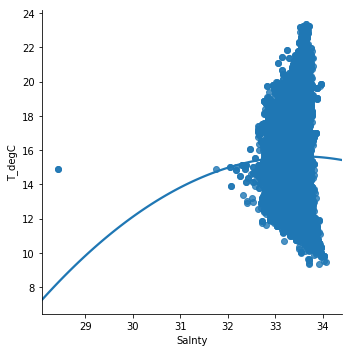

In [0]:
sns.lmplot(x="Salnty", y="T_degC", data=final_dataset,
           order=2, ci=None);

In [0]:
final_dataset[final_dataset['Salnty'] < 31]

,Salnty,T_degC
769299,28.431,14.91
769300,28.431,14.91


In [0]:
final_dataset = final_dataset[final_dataset['Salnty'] > 31]

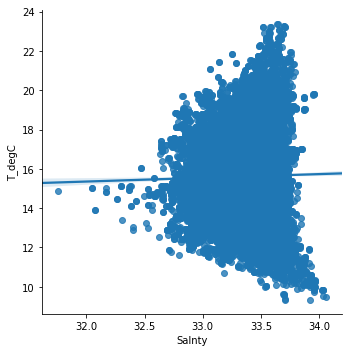

In [0]:
sns.lmplot(x="Salnty", y="T_degC", data=final_dataset)

It seems that there is **no distinct correlation** between **Salinity** and **Ocean Temperature**. But we do see a **slight increase** in the **Temperature**, as shown by the **line plot** on the above graph. Let us explore this further.

But it does seem like **increase in Salinity** increases the **range of Ocean Temperature**. As a **future project**, we can figure out the linear Regression for this, we will have to bucketize Salinity (i.e. convert it into ranges) and record the range of Ocean Temperature  

The first step to do **standard Linear Regression** is to **split** the dataset into the standard **x** (Independent variable) and **y** (Depenedent variable).

We will use the **Torch.tensor** method to do this. Here **x** will be **Salinity** and **y** will be **Ocean Temperature**.

In [0]:
x_intermediate = torch.tensor(final_dataset['Salnty'].values)
x_intermediate[:5]

tensor([33.5900, 33.5930, 33.5920, 33.5880, 33.5990], dtype=torch.float64)

In [0]:
n = len(x_intermediate)

Converting the **Independent variable** into a **Gradient Descent ready matrix** requires a bit of **PyTorch acrobatics**.

Basically, I am **reshaping x** form **(n) to (n,1)** and creating a **matrix of ones** in the **shape of (n,1)**.

I will then **concatenate** the 2 matrices **along columns** to create a matrix containing **(x, 1)** elements, which we can then **use in our linear equations**.

In [0]:
x_intermediate.resize_((n,1))


tensor([[33.5900],
        [33.5930],
        [33.5920],
        ...,
        [33.4150],
        [33.4062],
        [33.3880]], dtype=torch.float64)

In [0]:
buffer_col = torch.ones(n,1, dtype=x_intermediate.dtype, device=x_intermediate.device)
buffer_col[:5]

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=torch.float64)

In [0]:
x = torch.cat((x_intermediate, buffer_col), dim=1)
x[:5]

tensor([[33.5900,  1.0000],
        [33.5930,  1.0000],
        [33.5920,  1.0000],
        [33.5880,  1.0000],
        [33.5990,  1.0000]], dtype=torch.float64)

In [0]:
y = torch.tensor(final_dataset['T_degC'].values)
y[:5]

tensor([14.4000, 14.4000, 14.4200, 14.2200, 14.0900], dtype=torch.float64)

Next we will need to create a **linear equation formula** for our **linear regression**. 

We will again **assume** that **a = (-1.0,1.0)** can be the **coefficients** of our equation and using this we can **compute y_hat** which is our prediction and then compute our **error**.

We will use **Mean Standard Error (MSE)** for **calculating the error** in our predictions.

In [0]:
a = torch.tensor([-1.,1], dtype=x.dtype, device=x.device)
a

tensor([-1.,  1.], dtype=torch.float64)

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [0]:
y_hat = x@a
mse(y_hat, y)

tensor(2305.0594, dtype=torch.float64)

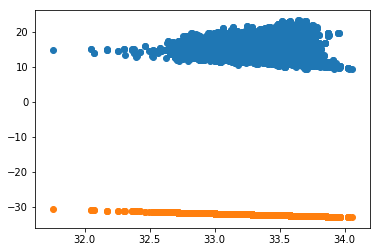

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

As you can see, there is a **huge difference** between the **first prediction** we made compared to the **actual output**.

But that is why we need **gradient descent** along with **continuous changes** in the **line coefficients** to get an **accurate predictions**. This is what we will try to achieve.

The next step in this process would be to create a **Parameter** and **Update** function. 

The **Parameter** will initially have **our coefficient value** as a **starting point**. As the **Updates progress**, its values will be **updated accordingly** to give **more accurate predictions**.

This will perform a Gradient descent and **make changes** in the **parameters of the equation** so that they **match the output as closely as possible**.

The Update function will also intermittently print the **Error** (which **should be decreasing** as we go through the Learning process).

In [0]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], dtype=torch.float64, requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

Now we will define a **Learning Rate (LR)** and **calling the Update function** for a set number of times so that we get the **most optimal coefficients**.

The Update function will also sometimes **show the error** so that we know how our model is doing.

The **actual number of times** we should **call the update function** depends on the **type and size** of data we have. Unfortunately, we will have to do this via **trial-and-error** through different run times and checking what is the **error** at the end of each run-time.

> **NOTE** - Originally I had used **Learning Rate** of **1e-1** and **100 updates**. This was actually **increasing** the **learning rate to Infinity**. This is a **standard case** of the **LR being too high** and overshooting the curve.

> By **tweaking** the **LR** and **Number of Updates**, I was able to get the **lowest possible Error Rate** which stayed constant after some time.

In [0]:
lr = 1e-5
for t in range(500): update()

tensor(2305.0594, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(1470.9176, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(939.2528, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(600.3807, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(384.3907, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(246.7231, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(158.9766, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(103.0488, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(67.4016, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(44.6808, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(30.1990, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(20.9687, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(15.0854, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(11.3355, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(8.9455, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(7.4221, dtype=torch.float64, grad_fn=<MeanBackward0>)


Now that we have the **most optimal coefficients**, we can plot a **scatter-plot** of the **Prediction** line with the **Actual Output** data points.

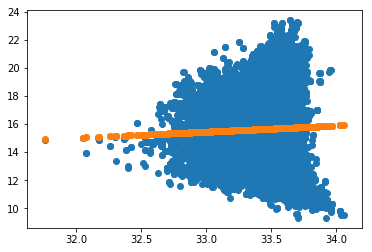

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

We can see that the **prediction** goes right **through the middle** of the **actual data points** and is **pretty accurate**.

We also notice that there is a **slight increase** in the **temperature** with increase in **salinity**. Which may prove that there is a **slight positive correlation** between **Salinity and Oceanic Temperatures**.

### Conclusion

1. We used standard **Stochastic Gradient Descent** to prove that there is a **slight correlation** between **Salinity and Oceanic Temperatures**.

2. We understood the basic concept of how **internally** all **Machine Learning operations** are basically a **combination** of **Matrix Multiplication (Linear Algebra)**, **Statistics** and **Calculus**.